In [2]:
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt           # Permite trabajar con fechas 
import numpy as np              # Manipulación de datos
import matplotlib.dates as mdates
import plotly.graph_objects as go
import pandas as pd

In [4]:
df_demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/demanda_exportada.txt', sep='\t')

df_demanda.head()

,Id,Values_code,Values_MarketType,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,MercadoComercializacion,ANTIOQUIA,NO REGULADO,294951.86,290723.68,291321.14,293399.70,291385.28,289337.38,262082.71,...,290709.35,291232.13,287914.90,318506.86,322170.62,319280.72,320506.29,328687.96,331208.94,2023-12-17
1,MercadoComercializacion,ANTIOQUIA,REGULADO,676667.17,631745.06,603032.20,589405.05,596294.79,614884.51,652357.14,...,927544.43,909881.44,910653.83,974499.67,973105.18,943458.62,892293.59,815320.71,731452.11,2023-12-17
2,MercadoComercializacion,ARAUCA,NO REGULADO,89730.56,89914.35,90293.80,90937.52,88394.22,79719.12,76414.67,...,90645.12,91745.64,91624.00,91083.98,91400.11,91505.66,91541.78,91031.61,90593.60,2023-12-17
3,MercadoComercializacion,ARAUCA,REGULADO,35791.75,34595.30,33846.83,33165.64,32770.99,32384.93,31520.02,...,36875.41,37877.15,37820.94,41830.93,42138.62,42399.26,41648.55,40023.69,37764.16,2023-12-17
4,MercadoComercializacion,BAJO PUTUMAYO,NO REGULADO,148.18,139.76,134.66,136.65,126.56,129.93,134.40,...,170.49,168.17,300.55,155.29,147.10,148.55,142.40,124.96,121.28,2023-12-17


In [24]:
# Asegúrate de que la columna 'Date' esté en formato datetime
df_demanda['Date'] = pd.to_datetime(df_demanda['Date'])

# Suma de la demanda por horas (diaria)
df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True)

# Agrupar por mes y sumar la demanda diaria
df_demanda_mensual = df_demanda.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['demanda_diaria'].sum() 

df_demanda_mensual = df_demanda_mensual.reset_index()

# Definir la región específica a seleccionar
regiones_especificas = ['CARIBE MAR', 'CARIBE SOL']

# Filtrar el DataFrame por la región específica
df_region = df_demanda_mensual[df_demanda_mensual['Values_code'].isin(regiones_especificas)]

C:\Users\jonal\AppData\Local\Temp\ipykernel_3728\1810020614.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [23]:
df_region.head()

,Date,Values_code,demanda_diaria,Mes
8,2021-01-31,CARIBE MAR,8.376558e+08,2021-01
9,2021-01-31,CARIBE SOL,7.662896e+08,2021-01
38,2021-02-28,CARIBE MAR,8.071371e+08,2021-02
39,2021-02-28,CARIBE SOL,7.173129e+08,2021-02
68,2021-03-31,CARIBE MAR,9.151873e+08,2021-03


C:\Users\jonal\AppData\Local\Temp\ipykernel_3728\1988944846.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



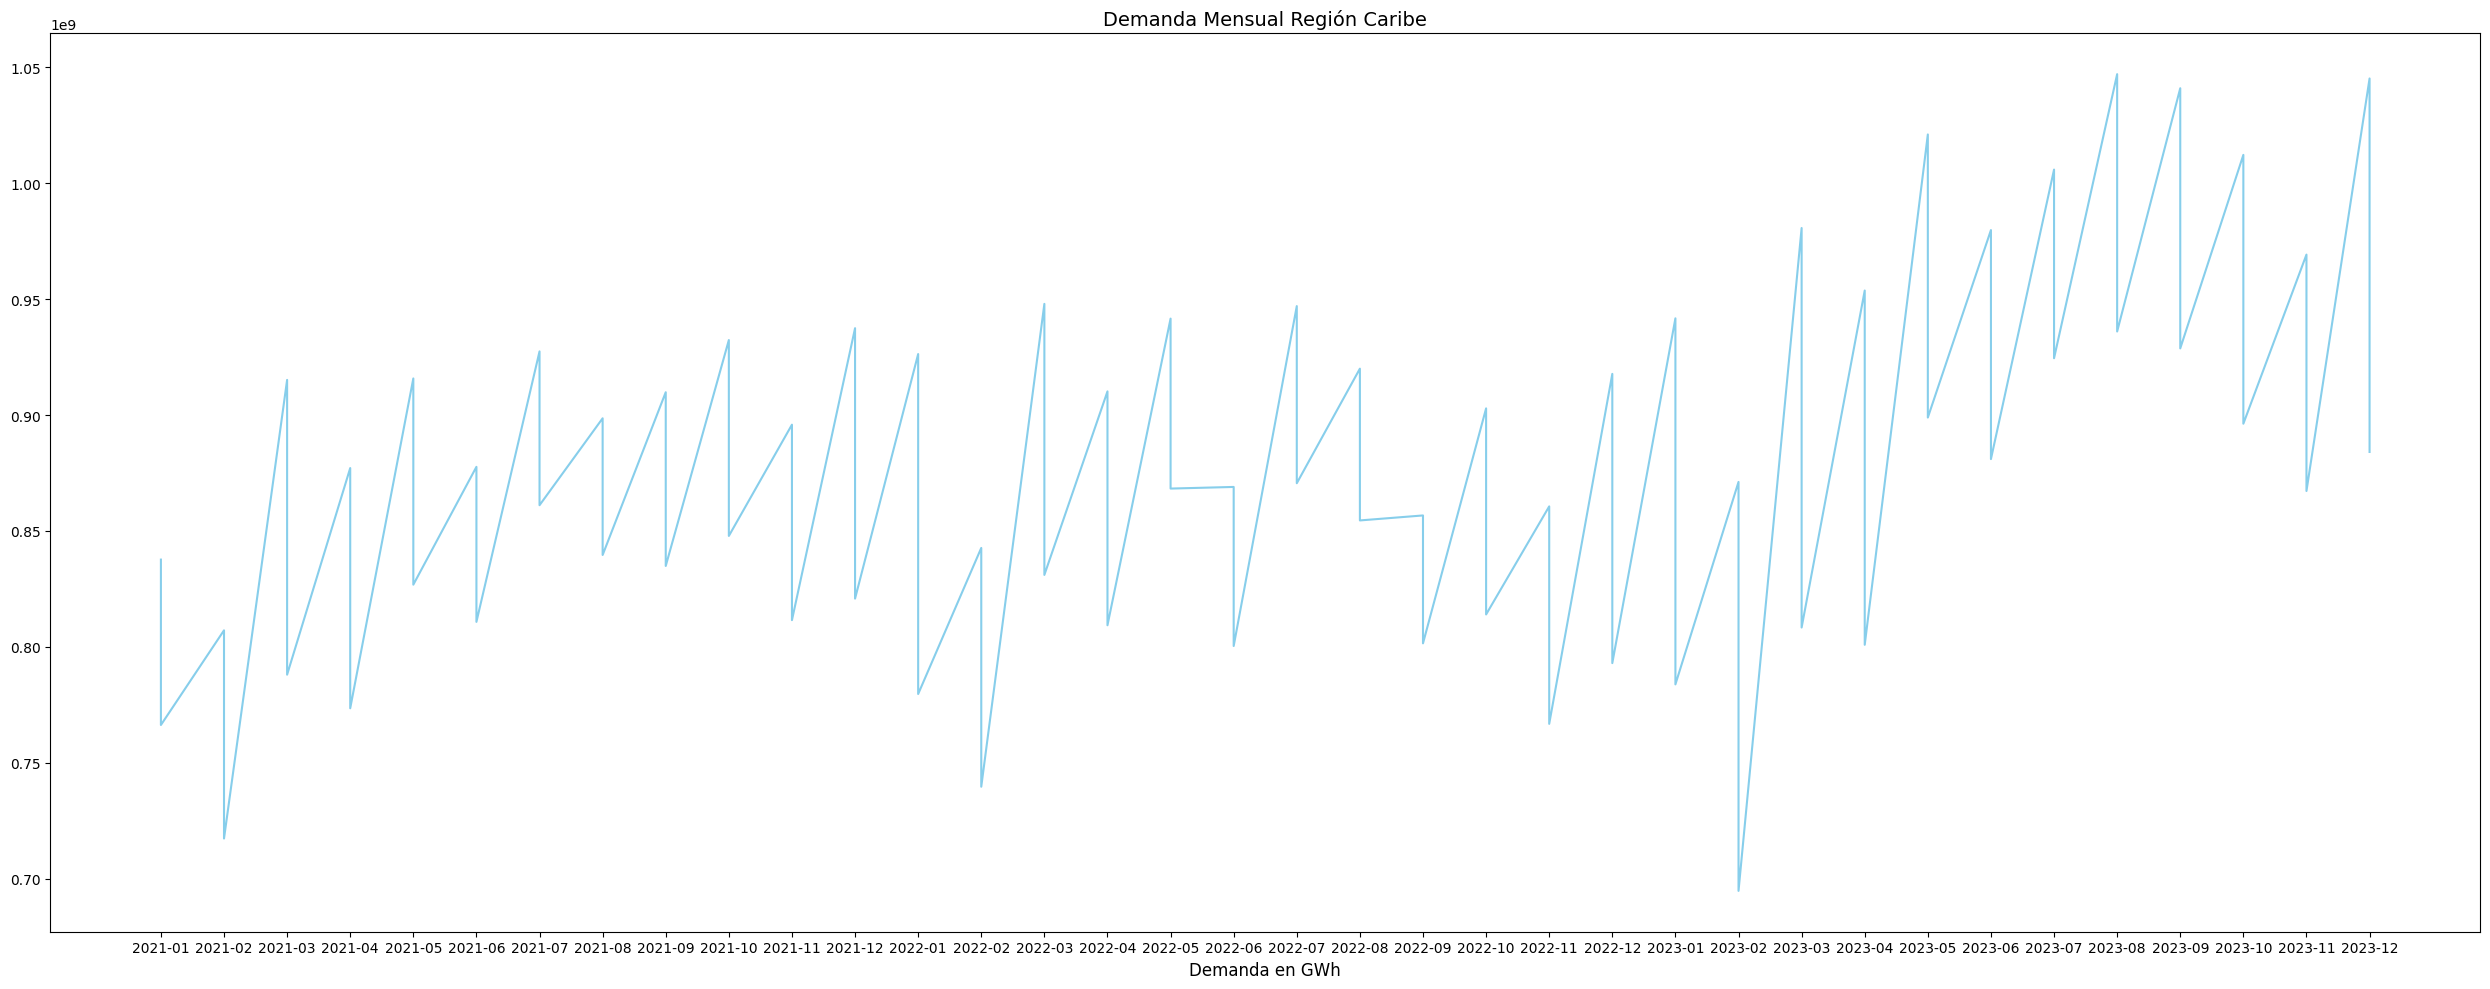

In [22]:
%matplotlib inline

#df_demanda_mensual = df_demanda_mensual.reset_index()

df_region['Mes'] = df_region['Date'].dt.strftime('%Y-%m')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(25, 10))

# Graficar la demanda mensual en un gráfico de barras horizontales
ax.plot(df_region['Mes'], df_region['demanda_diaria'], color='skyblue')

# Añadir etiquetas de los ejes
ax.set_xlabel('Demanda en GWh', fontsize=12)
#ax.set_ylabel('Región', fontsize=12)

# Añadir título al gráfico
ax.set_title('Demanda Mensual Región Caribe', fontsize=14)

# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Demanda Diaria (Entre los Años 2021 y 2023)**

In [32]:
# Asegúrate de que la columna 'Date' esté en formato datetime
df_demanda['Date'] = pd.to_datetime(df_demanda['Date'])

# Suma de la demanda por horas (diaria)
df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True)

# Agrupar por mes y sumar la demanda diaria
df_demanda_diaria = df_demanda.groupby([pd.Grouper(key='Date', freq='D'), 'Values_code'])['demanda_diaria'].sum() 

df_demanda_diaria = df_demanda_diaria.reset_index()

# Definir la región específica a seleccionar
regiones_diario = ['CARIBE MAR', 'CARIBE SOL']

# Filtrar el DataFrame por la región específica
df_region_diario = df_demanda_diaria[df_demanda_diaria['Values_code'].isin(regiones_diario)]

Función Filtro de Fechas

In [33]:
# Función de filtro de fechas corregida
def fecha_t (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(['CARIBE MAR', 'CARIBE SOL']))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['demanda_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=True)
    
    return df_combinado


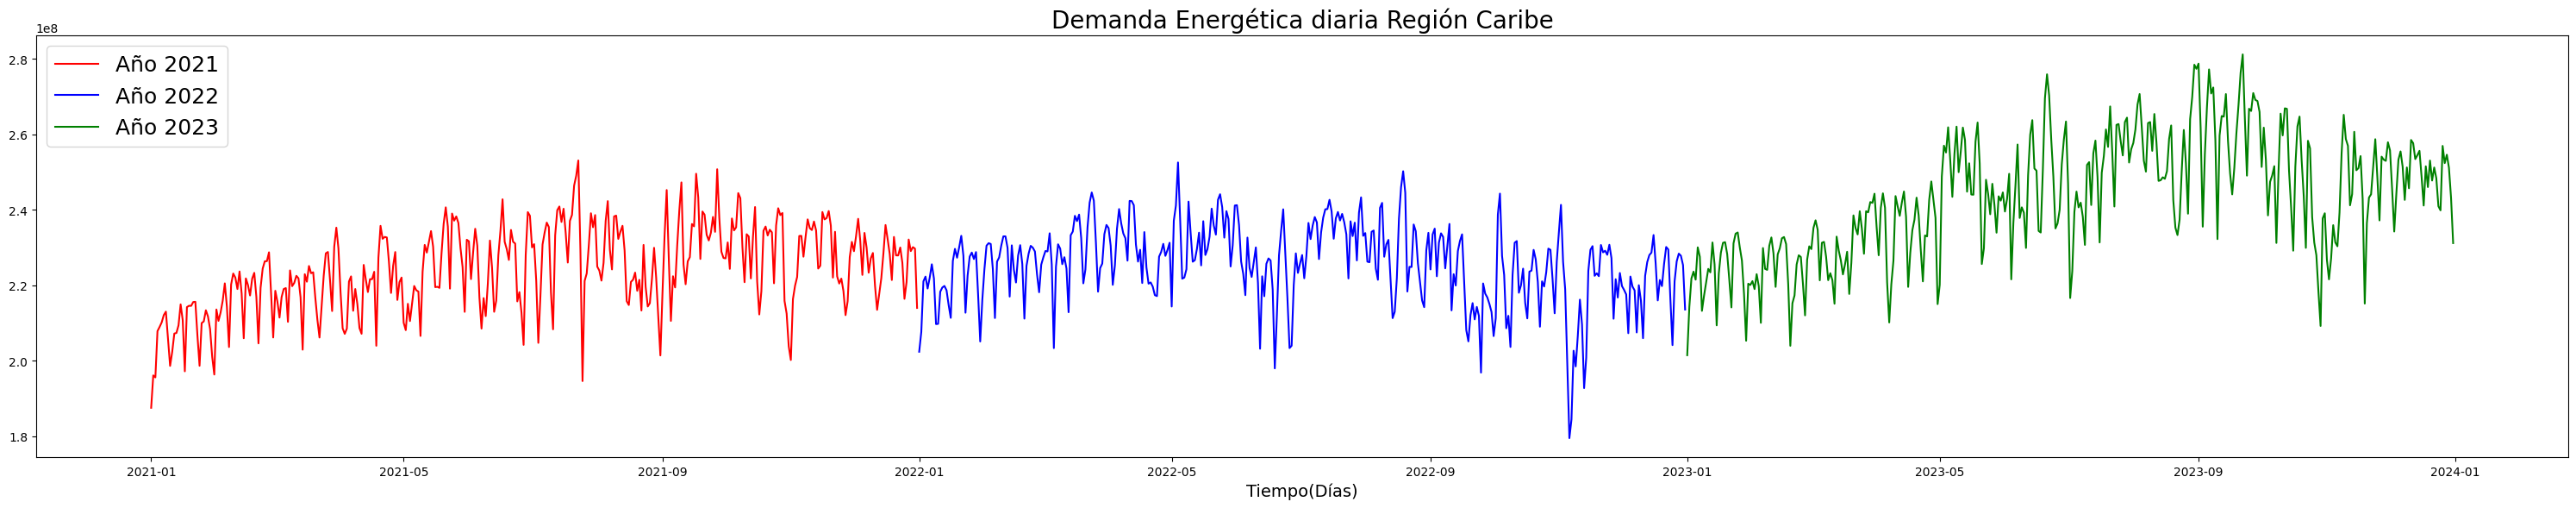

In [36]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_t('2021-01-01','2021-12-31').index, fecha_t('2021-01-01','2021-12-31')['demanda_diaria'], color="r", label='Año 2021')
ax.plot(fecha_t('2022-01-01','2022-12-31').index, fecha_t('2022-01-01','2022-12-31')['demanda_diaria'], color="b", label='Año 2022')
ax.plot(fecha_t('2023-01-01','2023-12-31').index, fecha_t('2023-01-01','2023-12-31')['demanda_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)

# Añadir título al gráfico
ax.set_title('Demanda Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
# Función de filtro de fechas corregida
def fecha_f (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(['CARIBE MAR', 'CARIBE SOL']))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['demanda_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=False)
    
    return df_combinado

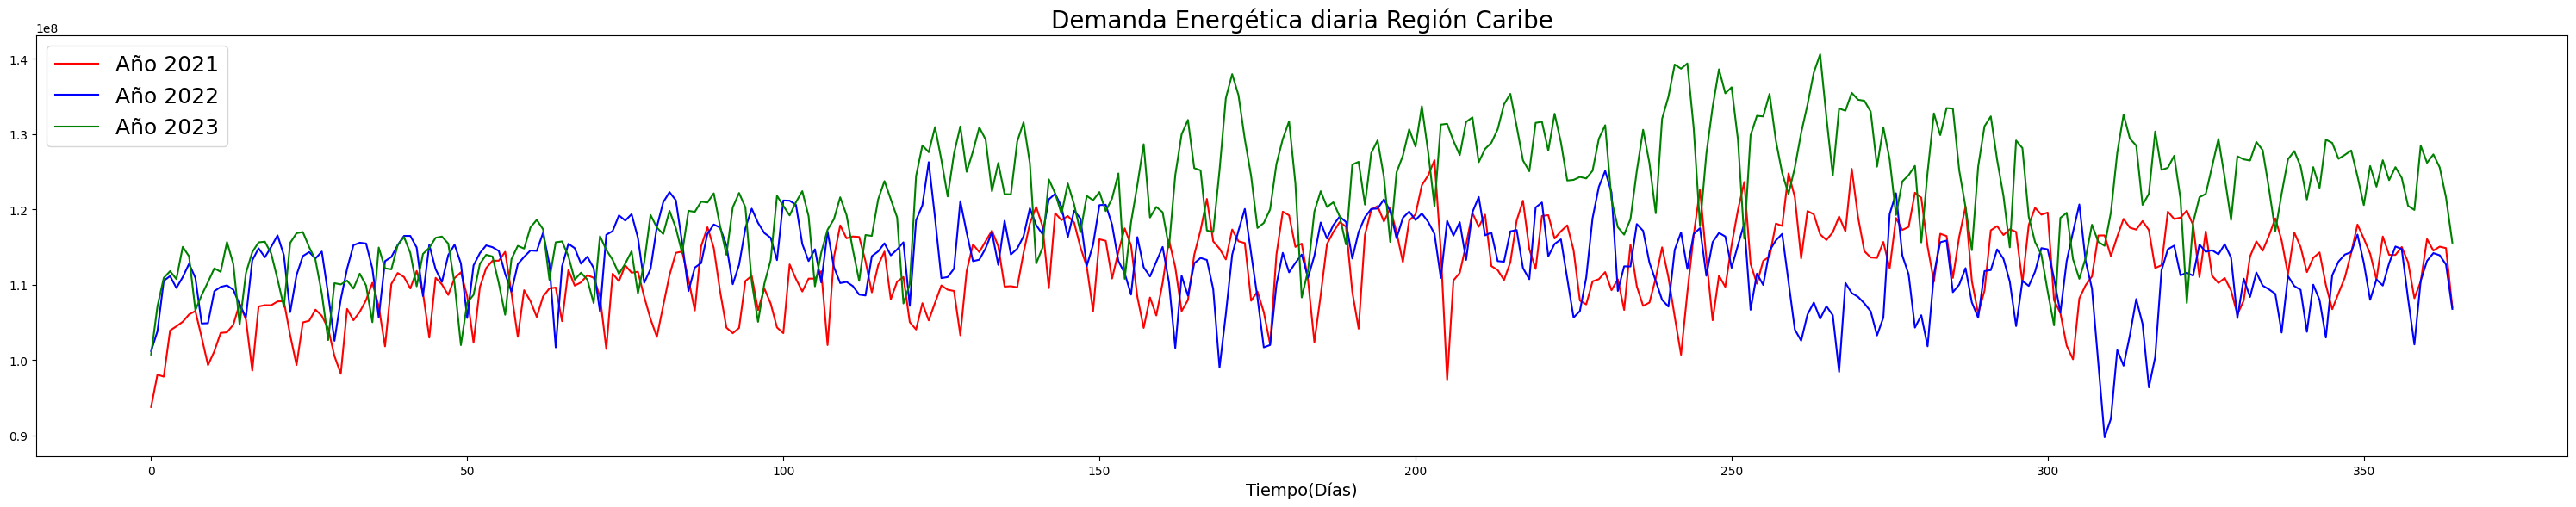

In [9]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_f('2021-01-01','2021-12-31').index, fecha_f('2021-01-01','2021-12-31')['demanda_diaria'], color="r", label='Año 2021')
ax.plot(fecha_f('2022-01-01','2022-12-31').index, fecha_f('2022-01-01','2022-12-31')['demanda_diaria'], color="b", label='Año 2022')
ax.plot(fecha_f('2023-01-01','2023-12-31').index, fecha_f('2023-01-01','2023-12-31')['demanda_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)

# Añadir título al gráfico
ax.set_title('Demanda Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

